In [4]:
import ROOT as r
import json
import matplotlib.pyplot as plt
import mplhep as hep
from root_numpy import hist2array


Welcome to JupyROOT 6.24/07


In [9]:
def zbrajanje():
    filename_list = ["QCD1000","QCD1500", "QCD2000", "QCD700"]

    f = r.TFile.Open("QCD1000_total.root")

    hist_1000 = f.dijet01m_1000

    hist_ult01 = hist_1000.Clone("dijet01m_ult")
    hist_ult02 = hist_1000.Clone("dijet02m_ult")
    hist_ult12 = hist_1000.Clone("dijet12m_ult")
    #print(type(hist_ult), type(hist_1000))
    hist_ult01.Reset()
    hist_ult02.Reset()
    hist_ult12.Reset()

    with open("norma.json", "r") as nora:
        dict_norma = json.load(nora)

    for name in filename_list:
        filename = name + "_total.root"

        g = r.TFile.Open(filename) #ime novog file-a mora biti drugačije od onog gore, inače program izgubi informaciju o kloniranom histogramu

        if "1000" in filename:
            hist_stari = g.dijet01m_1000 #mozda ovo treba odvojiti ako već imam otvoren QCD1000 file
        elif "1500" in filename:
            hist_stari = g.dijet01m_1500
        elif "2000" in filename:
            hist_stari = g.dijet01m_2000
        else:
            hist_stari = g.dijet01m_700


        norma = dict_norma[name]
        #print(norma)
        #print(type(hist_ult))
        hist_ult01.Add(hist_stari, norma)
        #treba još i spremiti
        
    for name in filename_list:
        filename = name + "_total.root"

        g = r.TFile.Open(filename) #ime novog file-a mora biti drugačije od onog gore, inače program izgubi informaciju o kloniranom histogramu

        if "1000" in filename:
            hist_stari = g.dijet02m_1000 #mozda ovo treba odvojiti ako već imam otvoren QCD1000 file
        elif "1500" in filename:
            hist_stari = g.dijet02m_1500
        elif "2000" in filename:
            hist_stari = g.dijet02m_2000
        else:
            hist_stari = g.dijet02m_700


        norma = dict_norma[name]
        #print(norma)
        #print(type(hist_ult))
        hist_ult02.Add(hist_stari, norma)
        #treba još i spremiti
    
    for name in filename_list:
        filename = name + "_total.root"

        g = r.TFile.Open(filename) #ime novog file-a mora biti drugačije od onog gore, inače program izgubi informaciju o kloniranom histogramu

        if "1000" in filename:
            hist_stari = g.dijet12m_1000 #mozda ovo treba odvojiti ako već imam otvoren QCD1000 file
        elif "1500" in filename:
            hist_stari = g.dijet12m_1500
        elif "2000" in filename:
            hist_stari = g.dijet12m_2000
        else:
            hist_stari = g.dijet12m_700


        norma = dict_norma[name]
        #print(norma)
        #print(type(hist_ult))
        hist_ult12.Add(hist_stari, norma)
        #treba još i spremiti


        
    plt.style.use([hep.style.CMS])
    
    dijet01, edges = hist2array(hist_ult01,return_edges=True)
    dijet02, edges = hist2array(hist_ult02,return_edges=True)
    dijet12, edges = hist2array(hist_ult12,return_edges=True)

    edges = edges[0]

    hep.histplot([dijet01,dijet02,dijet12],edges,label=["Dijet 01","Dijet 02","Dijet 12"],stack=True)

    #It returns a list of arrays, where each array represents binning in one dimension. 
    #We only work with 1D so we take edges[0]

    hep.cms.text("Work in progress",loc=0)
    plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
    plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
    plt.xlim([0, 3200])
    plt.legend()
    plt.savefig("dijet_stacked.png")

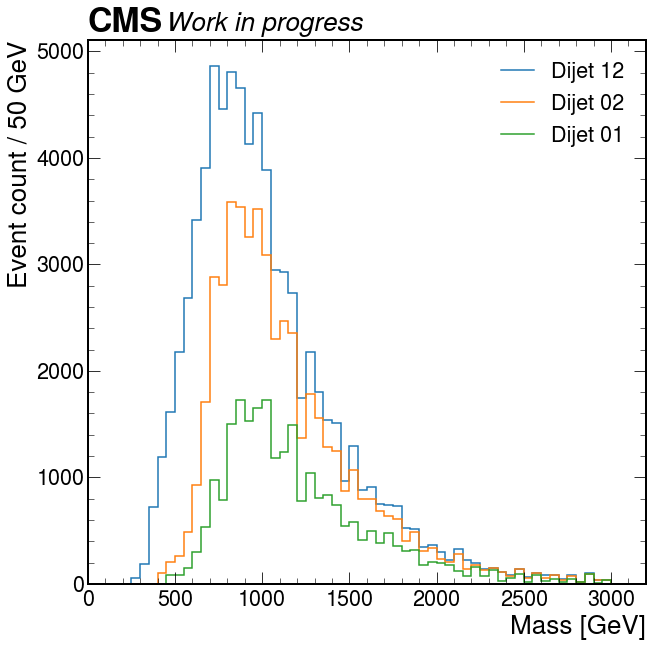

In [10]:
zbrajanje()

In [2]:
def zbrajanje_trijet():
    filename_list = ["QCD1000","QCD1500", "QCD2000", "QCD700"]

    f = r.TFile.Open("QCD1000_total.root")

    hist_1000 = f.trijetm_1000

    hist_ult = hist_1000.Clone("trijetm_ult")
    #print(type(hist_ult), type(hist_1000))
    hist_ult.Reset()

    broj = hist_ult.Integral()
    print(broj)


    with open("norma.json", "r") as nora:
        dict_norma = json.load(nora)

    for name in filename_list:
        filename = name + "_total.root"

        g = r.TFile.Open(filename) #ime novog file-a mora biti drugačije od onog gore, inače program izgubi informaciju o kloniranom histogramu

        if "1000" in filename:
            hist_stari = g.trijetm_1000 #mozda ovo treba odvojiti ako već imam otvoren QCD1000 file
        elif "1500" in filename:
            hist_stari = g.trijetm_1500
        elif "2000" in filename:
            hist_stari = g.trijetm_2000
        else:
            hist_stari = g.trijetm_700


        norma = dict_norma[name]
        print(norma)
        #print(type(hist_ult))
        hist_ult.Add(hist_stari, norma)
        #treba još i spremiti

        broj2 = hist_ult.Integral()
        print(broj2)
        
    plt.style.use([hep.style.CMS])
    counts, edges = hist2array(hist_ult,return_edges=True)

    edges = edges[0]
    #It returns a list of arrays, where each array represents binning in one dimension. 
    #We only work with 1D so we take edges[0]

    hep.histplot(counts,edges,label="Trijet masses")
    hep.cms.text("Work in progress",loc=0)
    plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
    plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
    plt.xlim([0, 3200])
    plt.legend()
    plt.savefig("Trijet_ultimate.png")

In [3]:
def zbrajanje_dijet01():
    filename_list = ["QCD1000","QCD1500", "QCD2000", "QCD700"]

    f = r.TFile.Open("QCD1000_total.root")

    hist_1000 = f.dijet01m_1000

    hist_ult = hist_1000.Clone("dijet01m_ult")
    #print(type(hist_ult), type(hist_1000))
    hist_ult.Reset()

    broj = hist_ult.Integral()
    #print(broj)


    with open("norma.json", "r") as nora:
        dict_norma = json.load(nora)

    for name in filename_list:
        filename = name + "_total.root"

        g = r.TFile.Open(filename) #ime novog file-a mora biti drugačije od onog gore, inače program izgubi informaciju o kloniranom histogramu

        if "1000" in filename:
            hist_stari = g.dijet01m_1000 #mozda ovo treba odvojiti ako već imam otvoren QCD1000 file
        elif "1500" in filename:
            hist_stari = g.dijet01m_1500
        elif "2000" in filename:
            hist_stari = g.dijet01m_2000
        else:
            hist_stari = g.dijet01m_700


        norma = dict_norma[name]
        #print(norma)
        #print(type(hist_ult))
        hist_ult.Add(hist_stari, norma)
        #treba još i spremiti

        
    broj2 = hist_ult.Integral()
    print(broj2)
        
    plt.style.use([hep.style.CMS])
    counts, edges = hist2array(hist_ult,return_edges=True)

    edges = edges[0]
    #It returns a list of arrays, where each array represents binning in one dimension. 
    #We only work with 1D so we take edges[0]

    hep.histplot(counts,edges,label="Dijet01 masses")
    hep.cms.text("Work in progress",loc=0)
    plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
    plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
    plt.xlim([0, 3200])
    plt.legend()
    #plt.savefig("dijet01_ultimate.png")

In [5]:
def zbrajanje_dijet02():
    filename_list = ["QCD1000","QCD1500", "QCD2000", "QCD700"]

    f = r.TFile.Open("QCD1000_total.root")

    hist_1000 = f.dijet02m_1000

    hist_ult = hist_1000.Clone("dijet02m_ult")
    #print(type(hist_ult), type(hist_1000))
    hist_ult.Reset()

    broj = hist_ult.Integral()
    #print(broj)


    with open("norma.json", "r") as nora:
        dict_norma = json.load(nora)

    for name in filename_list:
        filename = name + "_total.root"

        g = r.TFile.Open(filename) #ime novog file-a mora biti drugačije od onog gore, inače program izgubi informaciju o kloniranom histogramu

        if "1000" in filename:
            hist_stari = g.dijet02m_1000 #mozda ovo treba odvojiti ako već imam otvoren QCD1000 file
        elif "1500" in filename:
            hist_stari = g.dijet02m_1500
        elif "2000" in filename:
            hist_stari = g.dijet02m_2000
        else:
            hist_stari = g.dijet02m_700


        norma = dict_norma[name]
        #print(norma)
        #print(type(hist_ult))
        hist_ult.Add(hist_stari, norma)
        #treba još i spremiti

    broj2 = hist_ult.Integral()
    print(broj2)
        
    plt.style.use([hep.style.CMS])
    counts, edges = hist2array(hist_ult,return_edges=True)

    edges = edges[0]
    #It returns a list of arrays, where each array represents binning in one dimension. 
    #We only work with 1D so we take edges[0]

    hep.histplot(counts,edges,label="Dijet02 masses")
    hep.cms.text("Work in progress",loc=0)
    plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
    plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
    plt.xlim([0, 3200])
    plt.legend()
    #plt.savefig("dijet02_ultimate.png")

In [4]:
def zbrajanje_dijet12():
    filename_list = ["QCD1000","QCD1500", "QCD2000", "QCD700"]

    f = r.TFile.Open("QCD1000_total.root")

    hist_1000 = f.dijet12m_1000

    hist_ult = hist_1000.Clone("dijet12m_ult")
    #print(type(hist_ult), type(hist_1000))
    hist_ult.Reset()

    broj = hist_ult.Integral()
    #print(broj)


    with open("norma.json", "r") as nora:
        dict_norma = json.load(nora)

    for name in filename_list:
        filename = name + "_total.root"

        g = r.TFile.Open(filename) #ime novog file-a mora biti drugačije od onog gore, inače program izgubi informaciju o kloniranom histogramu

        if "1000" in filename:
            hist_stari = g.dijet12m_1000 #mozda ovo treba odvojiti ako već imam otvoren QCD1000 file
        elif "1500" in filename:
            hist_stari = g.dijet12m_1500
        elif "2000" in filename:
            hist_stari = g.dijet12m_2000
        else:
            hist_stari = g.dijet12m_700


        norma = dict_norma[name]
        #print(norma)
        #print(type(hist_ult))
        hist_ult.Add(hist_stari, norma)
        #treba još i spremiti

    broj2 = hist_ult.Integral()
    print(broj2)
        
    plt.style.use([hep.style.CMS])
    counts, edges = hist2array(hist_ult,return_edges=True)

    edges = edges[0]
    #It returns a list of arrays, where each array represents binning in one dimension. 
    #We only work with 1D so we take edges[0]

    hep.histplot(counts,edges,label="Dijet12 masses")
    hep.cms.text("Work in progress",loc=0)
    plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
    plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
    plt.xlim([0, 3200])
    plt.legend()
    plt.savefig("dijet12_ultimate.png")

0.0
21.309847367529716
15087.371854782104
1.9709483767331493
18461.635555267334
0.9853278010347559
18932.62223815918
35.55574617057189
23945.98272705078


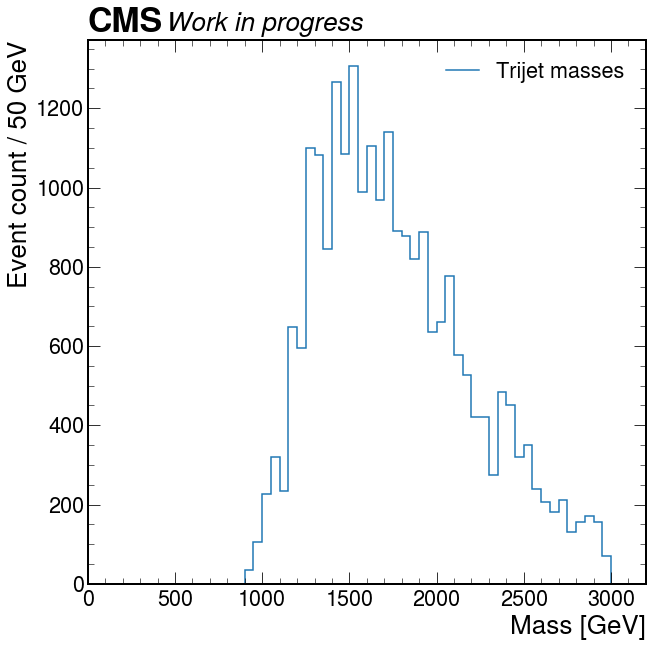

In [29]:
zbrajanje_trijet()

24903.152793884277
25066.240434408188
25151.848288178444


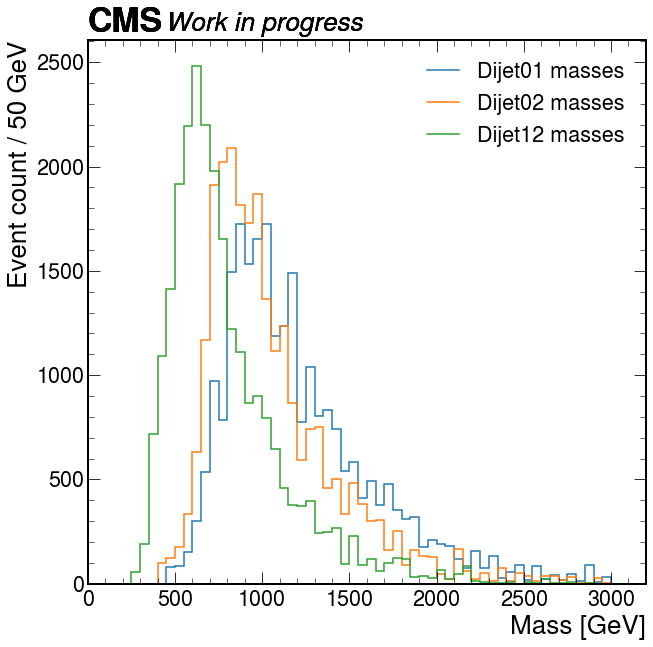

In [6]:
zbrajanje_dijet01()
zbrajanje_dijet02()
zbrajanje_dijet12()